In [1]:
#Importing The Libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
log=LogisticRegression()
from sklearn.tree import DecisionTreeClassifier 
dt=DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier 
rf=RandomForestClassifier()
rf1=RandomForestClassifier()
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import joblib
import joblib
import tkinter as tk
from tkinter import messagebox
import pyttsx3

In [2]:
#Reading the creditcard.csv file into DataFrame
creditcard_df=pd.read_csv('creditcard.csv')

In [3]:
#By Setting it to None means that there is no maximum limit imposed on the number of columns displayed 
pd.options.display.max_columns=None 

In [4]:
#Displaying the First 5 rows of the dataset
creditcard_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#Displaying the Last 5 rows of the dataset
creditcard_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
#Shape of the dataset
creditcard_df.shape

(284807, 31)

In [7]:
#Displaying the Unique Values
unique_values = creditcard_df.nunique()
print(unique_values)

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64


In [8]:
#Displaying the number of rows and columns of the dataset
print("Number of Rows:",creditcard_df.shape[0])
print("Number of Columns:",creditcard_df.shape[1])

Number of Rows: 284807
Number of Columns: 31


In [9]:
#Information about shape of the dataset,datatypes,null values and memory requirements
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

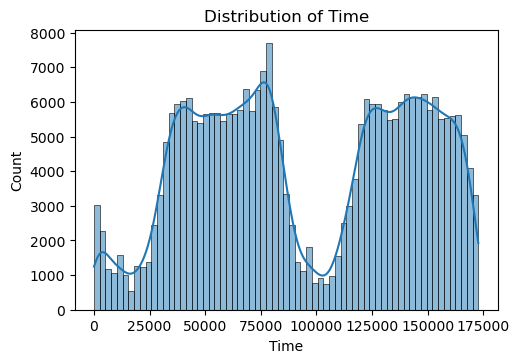

In [10]:
#Visualizing the distribution of Time which provides insights into the frequency of time
plt.figure(figsize=(12,8))
plt.subplot(2,2,2)
sns.histplot(creditcard_df['Time'], kde=True)
plt.title("Distribution of Time")
plt.show()

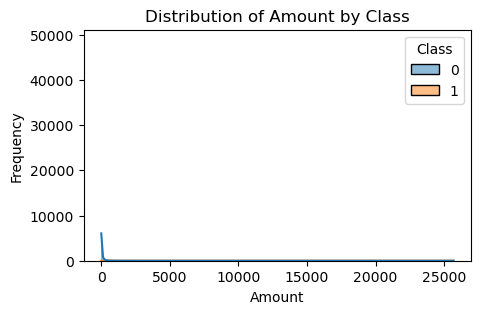

In [11]:
#Visualizing the distribution of Amount by Class
plt.figure(figsize=(5,3))
sns.histplot(creditcard_df,x='Amount',hue='Class',multiple='stack',kde=True)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Amount by Class')
plt.show()

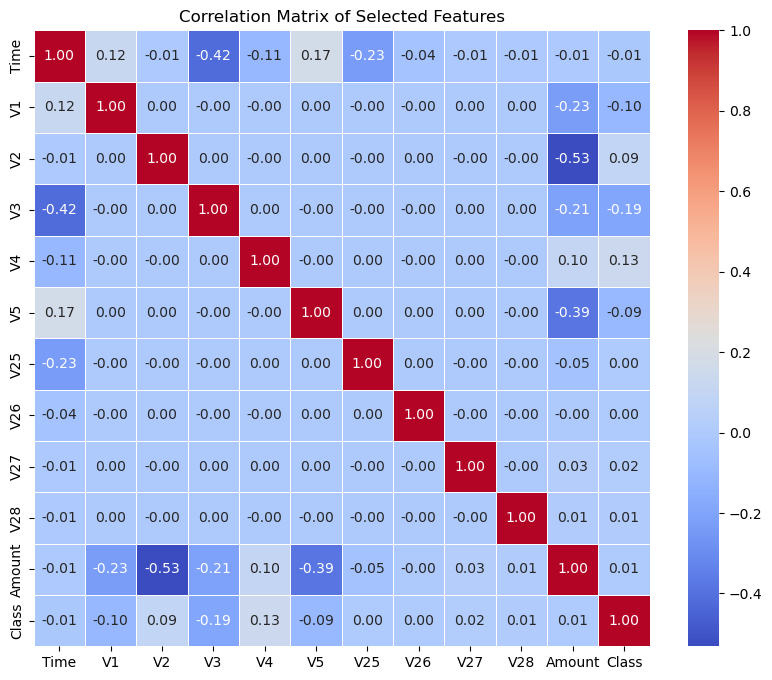

In [12]:
selected_columns = creditcard_df.columns[:6].tolist() + creditcard_df.columns[-6:].tolist()
correlation_matrix = creditcard_df[selected_columns].corr()
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))
# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True, linewidths=0.5)
# Add title
plt.title('Correlation Matrix of Selected Features')
# Show the plot
plt.show()

In [13]:
#A DataFrame of the same shape as creditcard_df where each element is either True if the corresponding element in creditcard_df is NaN (missing),and False otherwise.
creditcard_df.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
#The sum of missing values for each column in the DataFrame
creditcard_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [15]:
#Due to the varying range of amounts across all rows, feature scaling is applied to standardize the 'amount' feature.
creditcard_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
#Performing feature scaling on the 'Amount' column of the DataFrame creditcard_df using StandardScaler(sc).
creditcard_df['Amount']=sc.fit_transform(pd.DataFrame(creditcard_df['Amount']))

In [17]:
#Removing the 'Time' column from the DataFrame creditcard_df.
creditcard_df=creditcard_df.drop(['Time'],axis=1)

In [18]:
#The Time Column is Dropped
creditcard_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [19]:
#Before Removing the Duplicate Values
creditcard_df.shape

(284807, 30)

In [20]:
#Checking for the Duplicate Values in the Dataframe
creditcard_df.duplicated().any()

True

In [21]:
#Eliminating the duplicate Values in the Dataframe 
creditcard_df=creditcard_df.drop_duplicates()

In [22]:
#After Removing the Duplicate Values
creditcard_df.shape

(275663, 30)

In [23]:
#The Total number of duplicates removed
284807-275663

9144

### If Not Addressing the imbalance in Dataframe

In [24]:
#Count of the number of occurrences for each unique value in the 'Class' column used to understand the distribution of classes in a binary classification problem
creditcard_df['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

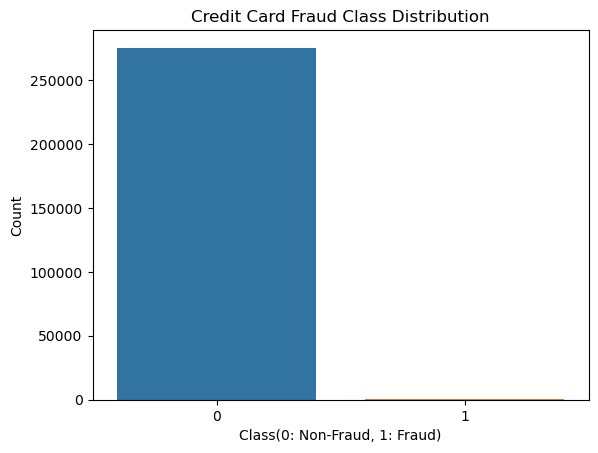

In [25]:
#Visualizing the Class distribution between Fraudulent and Normal Transactions.
sns.countplot(x='Class',data=creditcard_df)
plt.xlabel('Class(0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.title('Credit Card Fraud Class Distribution')
plt.show()   

The dataset exhibits a significant class imbalance, where one class is represented by a considerably higher number of observations compared to the other class, which is characterized by a substantially lower number of observations. This imbalance can potentially impact the performance of machine learning models, leading to a bias towards the majority class and suboptimal predictions for the minority class. 

In [26]:
#Storing Feature Matrix in 'X' and Target Variable in 'Y'
X=creditcard_df.drop('Class',axis=1) #X contains independent variables
Y=creditcard_df['Class'] #Y contains dependent variables

In [27]:
#Splitting the dataset into Training set and Test set
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

### Training the Model using Logistic Regression to show the imbalance in dataset 

In [28]:
#Training the Model using Logistic Regression 
log.fit(X_train,Y_train)

LogisticRegression()

In [29]:
#Predicting the Model using Logistic Regression 
Y_predict=log.predict(X_test)  

In [30]:
#Accuracy Score: 
accuracy_score(Y_test,Y_predict)

0.9992200678359603

In [31]:
#Precision Score
precision_score(Y_test,Y_predict)

0.8870967741935484

In [32]:
#Recall Score: 
recall_score(Y_test,Y_predict)

0.6043956043956044

In [33]:
#F1 Score: 
f1_score(Y_test,Y_predict)

0.718954248366013

Due to the imbalanced nature of the dataset, the precision, recall, and F1 scores exhibit lower values in comparison to accuracy.In imbalanced datasets, it's common for the model to achieve high accuracy by simply predicting the majority class, but this may not be meaningful in practice.
To address this, we can consider using techniques such as resampling, changing the classification threshold, or using specialized algorithms designed to handle imbalanced datasets.

### Handling Imbalanced Dataset

Addressing this class imbalance is essential to ensure the model's accuracy and effectiveness in detecting both fraudulent and non-fraudulent transactions. Techniques like undersampling and oversampling can be employed to balance the class distribution and enhance the model's performance. 

### Undersampling

Undersampling is a technique used in imbalanced datasets to reduce the number of samples in the majority class to match the size of the minority class, thereby creating a balanced dataset for model training.                    

In [34]:
#Storing Normal transactions in 'normal' variable and Fraud transactions in 'fraud' variable
normal=creditcard_df[creditcard_df['Class']==0]
fraud=creditcard_df[creditcard_df['Class']==1]

In [35]:
#The number of Normal transactions
normal.shape

(275190, 30)

In [36]:
#The number of Fraud transactions
fraud.shape

(473, 30)

In [37]:
#A sample of 473 randomly selected instances is taken from the 'normal' DataFrame, and the resulting DataFrame is assigned to the variable 'normal_sample'.
normal_sample=normal.sample(n=473)
normal_sample.shape

(473, 30)

In [38]:
#A new DataFrame 'newcreditcard_df' is created by concatenating a sample of normal transactions with the entire fraud transactions DataFrame, and the resulting distribution of the 'Class' variable is displayed using the value counts.
newcreditcard_df=pd.concat([normal_sample,fraud],ignore_index=True)
newcreditcard_df['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [39]:
#The new dataframe after performing Undersampling 
newcreditcard_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,2.094783,-0.054013,-1.490974,0.270703,0.143746,-1.066554,0.197904,-0.324264,0.704372,0.023643,-1.098230,-0.101395,-0.404255,0.575683,0.876296,-0.132039,-0.563150,0.043905,-0.147070,-0.274960,0.217677,0.781341,-0.036323,-0.396341,0.289379,-0.078509,-0.020309,-0.064597,-0.350071,0
1,0.153802,1.477407,-0.792875,1.945422,1.312981,-0.417811,1.525842,-0.348073,-1.445859,-0.177370,-0.396050,-0.618440,0.103740,-0.350362,1.616495,-1.130330,1.466436,0.620349,2.142278,0.343360,0.187237,0.614688,-0.193297,0.530166,-0.058528,-0.117643,0.207525,0.216429,-0.125778,0
2,-0.674748,0.666514,1.953806,0.359585,-1.094902,0.234774,-0.549137,0.704260,-0.030376,-0.640666,-0.517085,-0.055928,0.091464,0.122207,1.924782,0.319182,0.019798,0.292138,-0.146887,-0.017539,0.433568,1.153693,0.071778,0.133244,-0.799540,0.602712,0.052122,0.110632,-0.185190,0
3,-0.494241,0.980836,1.676508,0.001494,-0.019966,-0.636440,0.605343,0.057704,-0.408948,-0.350595,0.102838,0.111896,-0.109129,0.203725,1.083917,-0.187306,0.008189,-0.900053,-0.466470,0.053145,-0.178603,-0.426819,0.049185,0.379359,-0.312267,0.080968,0.281527,0.121143,-0.349671,0
4,0.902125,-1.103808,0.698776,0.700926,-1.311448,0.111211,-0.631023,0.101538,-0.342625,0.592479,-0.843312,-0.329094,-0.537352,-0.030538,0.675879,-1.680411,0.268504,1.110365,-1.524906,-0.259117,-0.114920,-0.104578,-0.172291,0.052794,0.357963,-0.209611,0.054864,0.060655,0.406407,0


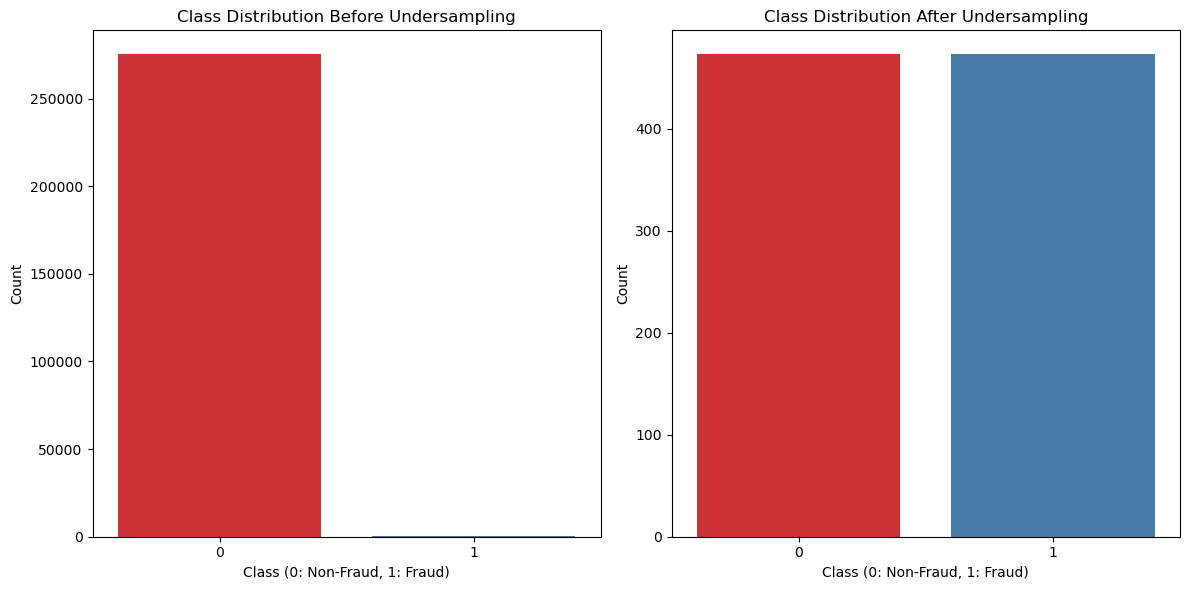

In [40]:
# Before undersampling (original dataset)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Create two side-by-side plots
sns.countplot(x='Class', data=creditcard_df, palette='Set1')
plt.title('Class Distribution Before Undersampling')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
# After undersampling (newcreditcard_df)
plt.subplot(1, 2, 2)
sns.countplot(x='Class', data=newcreditcard_df, palette='Set1')
plt.title('Class Distribution After Undersampling')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.tight_layout()  # Adjust subplots to fit the figure area
plt.show()

### Evaluating After Performing UnderSampling

In [41]:
#Storing Feature Matrix in 'X' and Target Variable in 'Y'
X=newcreditcard_df.drop('Class',axis=1) #X contains independent variables
Y=newcreditcard_df['Class'] #Y contains dependent variables

In [42]:
#Splitting the dataset into Training set and Test set
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

##### Training the Model using Logistic Regression after performing Undersampling

In [43]:
#Training the Model using Logistic Regression 
log.fit(X_train,Y_train)

LogisticRegression()

In [44]:
#Predicting the Model using Logistic Regression 
Y_predict1=log.predict(X_test)  

In [45]:
#Accuracy Score: 
accuracy_score(Y_test,Y_predict1)

0.9421052631578948

In [46]:
#Precision Score
precision_score(Y_test,Y_predict1)

0.9789473684210527

In [47]:
#Recall Score: 
recall_score(Y_test,Y_predict1)

0.9117647058823529

In [48]:
#F1 Score: 
f1_score(Y_test,Y_predict1)

0.9441624365482234

For imbalanced datasets, it is crucial to assess performance using metrics beyond accuracy, such as precision, recall, and F1-score, to obtain a more comprehensive evaluation of model effectiveness in capturing true positives, minimizing false negatives, and maintaining a balance between precision and recall.

##### Training the Model using Decision Tree Classifier after performing Undersampling

In [49]:
#Training the Model Using Decision Tree Classifier
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [50]:
#Predicting the Model Using Decision Tree Classifier
Y_predict2=dt.predict(X_test)

In [51]:
#Accuracy Score: 
accuracy_score(Y_test,Y_predict2)

0.8789473684210526

In [52]:
#Precision Score: 
precision_score(Y_test,Y_predict2)

0.883495145631068

In [53]:
#Recall Score:
recall_score(Y_test,Y_predict2)

0.8921568627450981

In [54]:
#F1 Score: 
f1_score(Y_test,Y_predict2)

0.8878048780487806

##### Training the Model using Random Forest Classifier after performing Undersampling

In [55]:
#Training the model using Random Forest Classifier
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [56]:
#Predicting the model using Random Forest Classifier
Y_predict3=rf.predict(X_test)

In [57]:
#Accuracy Score: 
accuracy_score(Y_test,Y_predict3)

0.9368421052631579

In [58]:
#Precision Score:
precision_score(Y_test,Y_predict3)

0.9787234042553191

In [59]:
#Recall Score: 
recall_score(Y_test,Y_predict3)

0.9019607843137255

In [60]:
#F1 Score: 
f1_score(Y_test,Y_predict3)

0.9387755102040817

##### Visualizing the Evaluation of the Models

In [61]:
final_accuracydata=pd.DataFrame({'Models':['LR','DT','RF'],"Accuracy":                                                                                                    
                                                          [accuracy_score(Y_test,Y_predict1)*100,                                    
                                                          accuracy_score(Y_test,Y_predict2)*100,                      
                                                          accuracy_score(Y_test,Y_predict3)*100]})
final_accuracydata

,Models,Accuracy
0,LR,94.210526
1,DT,87.894737
2,RF,93.684211


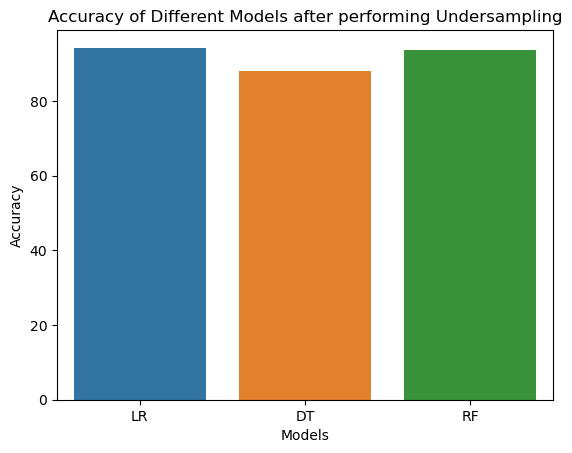

In [62]:
sns.barplot(x='Models',y='Accuracy',data=final_accuracydata)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models after performing Undersampling')
plt.show()

While undersampling reduces the majority class samples to balance the dataset, it may lead to information loss and reduced model performance due to the removal of the important instances. By combining oversampling with undersampling, we can achieve a more balanced dataset with a sufficient number of instances for both classes, which can improve the model's ability to make accurate predictions for the minority class.

### OverSampling

Oversampling is a technique used in machine learning to address class imbalance by artificially increasing the number of instances in the minority class. This involves duplicating or creating synthetic samples of the minority class to ensure a more equitable representation of both classes in the training dataset. The goal is to improve the model's ability to learn patterns from the minority class, resulting in better generalization and performance on unseen data.

SMOTE is one of the most commonly used oversampling technique to solve imbalanced datasets. It selects a random minority class instance and finds its k-nearest neighbors and then the synthetic samples are generated along the line segments connecting the original instance and its k-nearest neighbors.

In [63]:
#Store the feature matrix in vector 'X' and reseponse in vector 'Y'
X=creditcard_df.drop('Class',axis=1)
Y=creditcard_df['Class']

In [64]:
#The shape of X after dropping ‘Class’
X.shape

(275663, 29)

In [65]:
#The shape of Y i.e ‘Class’
Y.shape

(275663,)

In [66]:
#Performing oversampling on the features X and Y
X_result,Y_result=SMOTE().fit_resample(X,Y)
Y_result.value_counts()

Class
0    275190
1    275190
Name: count, dtype: int64

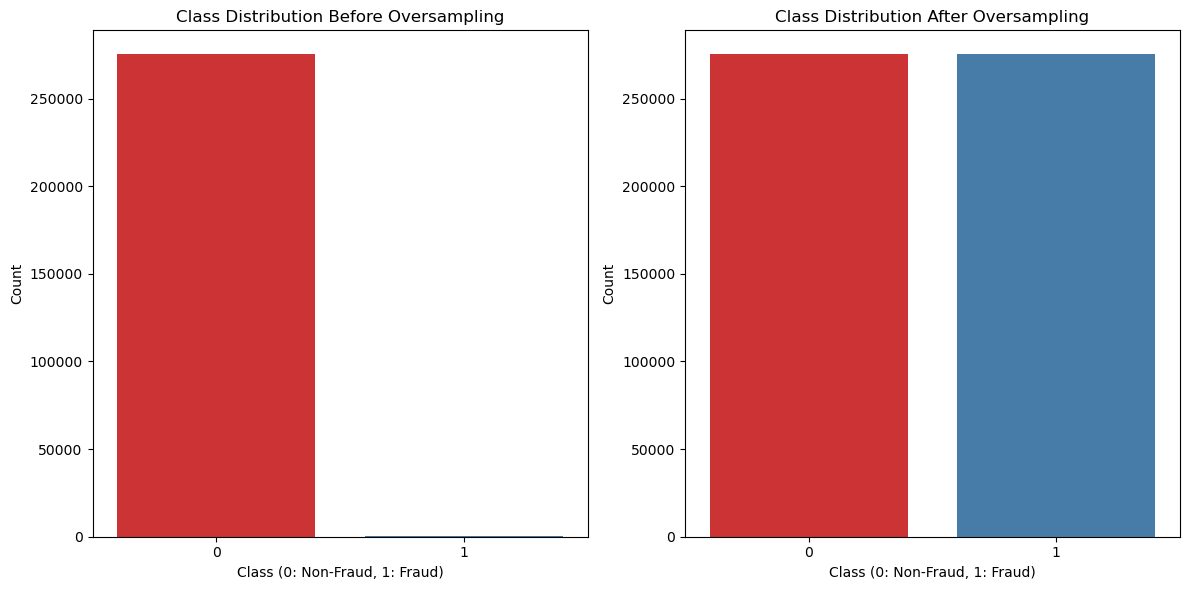

In [67]:
# Store the feature matrix in vector 'X' and response in vector 'Y'
X = creditcard_df.drop('Class', axis=1)
Y = creditcard_df['Class']
# Performing oversampling on the features X and Y
X_result, Y_result = SMOTE().fit_resample(X, Y)
# Plotting the class distribution before and after oversampling
plt.figure(figsize=(12, 6))
# Before oversampling (original dataset)
plt.subplot(1, 2, 1)
sns.countplot(x='Class', data=creditcard_df, palette='Set1')
plt.title('Class Distribution Before Oversampling')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
# After oversampling (SMOTE applied)
plt.subplot(1, 2, 2)
sns.countplot(x=Y_result, palette='Set1')
plt.title('Class Distribution After Oversampling')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.tight_layout()  # Adjust subplots to fit the figure area
plt.show()

By applying the Synthetic Minority Over-sampling Technique (SMOTE) to features X and Y, new datasets X_result and Y_result are generated. The value counts of the 'Class' variable in Y_result demonstrate that, post-oversampling, both classes (0 and 1) are now equally represented with 275,190 instances each, leading to a balanced dataset.

### Evaluating after performing Oversampling

In [68]:
#Splitting the dataset into the train and test sets 
X_train,X_test,Y_train,Y_test=train_test_split(X_result,Y_result,test_size=0.2,random_state=42)

##### Training the Model using Logistic Regression after performing Oversampling

In [69]:
#Training the Model using Logistic Regression
log.fit(X_train,Y_train)

LogisticRegression()

In [70]:
#Predicting the Model using Logistic Regression
Y_predict1=log.predict(X_test)  

In [71]:
#Accuracy Score: 
accuracy_score(Y_test,Y_predict1)

0.9441295105200044

In [72]:
#Precision Score
precision_score(Y_test,Y_predict1)

0.9729876265902445

In [73]:
#Recall Score: 
recall_score(Y_test,Y_predict1)

0.9135501699907278

In [74]:
#F1 Score: 
f1_score(Y_test,Y_predict1)

0.9423325769367814

In [75]:
# Generate classification report
print("Classification Report for Logistic Regression:")
print(classification_report(Y_test, Y_predict1))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     55073
           1       0.97      0.91      0.94     55003

    accuracy                           0.94    110076
   macro avg       0.95      0.94      0.94    110076
weighted avg       0.95      0.94      0.94    110076



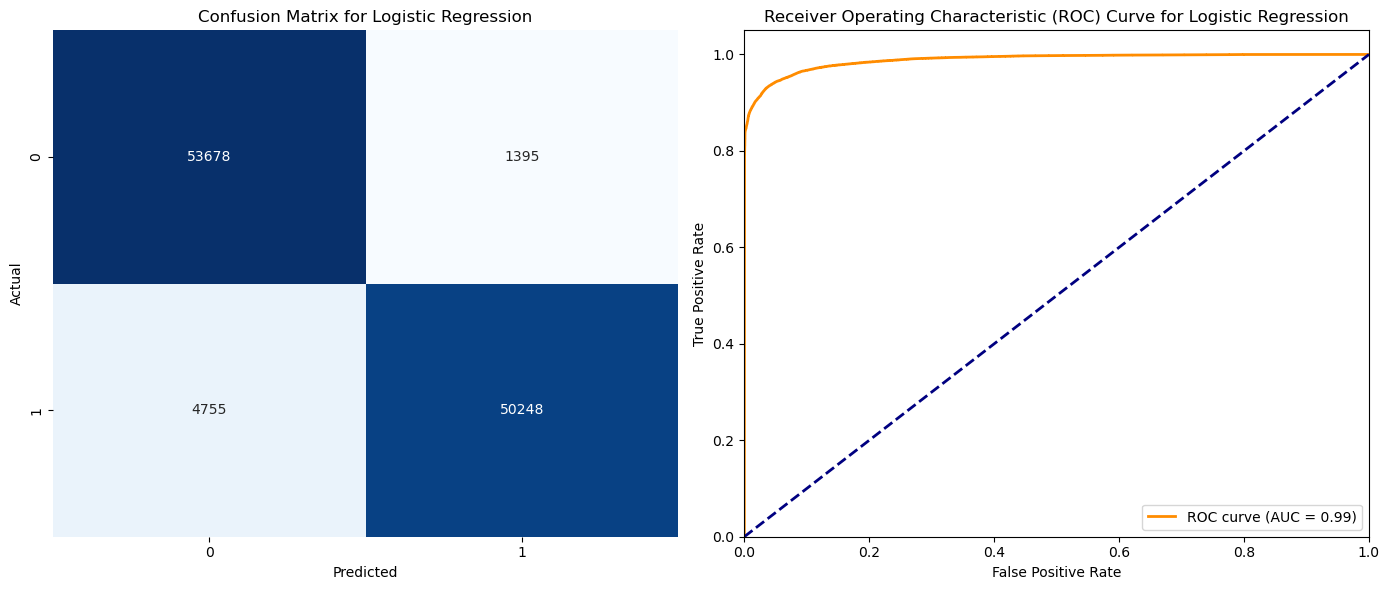

In [76]:
# Confusion Matrix and ROC Curve side by side
plt.figure(figsize=(14, 6))  # Adjust figure size
# Confusion Matrix
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
conf_matrix = confusion_matrix(Y_test, Y_predict1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
# ROC Curve
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
Y_prob1 = log.predict_proba(X_test)[:, 1]  # Getting probabilities for the positive class (1)
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random guessing)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc="lower right")
# Display both plots side by side
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

##### Training the Model using Decision Tree Classifier after performing Oversampling

In [77]:
#Training the Model Using Decision Tree Classifier
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [78]:
#Predicting the Model Using Decision Tree Classifier
Y_predict2=dt.predict(X_test)

In [79]:
#Accuracy Score: 
accuracy_score(Y_test,Y_predict2)

0.998010465496566

In [80]:
#Precision Score:
precision_score(Y_test,Y_predict2)

0.997096399535424

In [81]:
#Recall Score:
recall_score(Y_test,Y_predict2)

0.998927331236478

In [82]:
#F1 Score: 
f1_score(Y_test,Y_predict2)

0.9980110256386969

In [83]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, Y_predict2, target_names=['0', '1'], digits=4)
print("Classification Report for Decision Tree Classifier:")
print(report)

Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0     0.9989    0.9971    0.9980     55073
           1     0.9971    0.9989    0.9980     55003

    accuracy                         0.9980    110076
   macro avg     0.9980    0.9980    0.9980    110076
weighted avg     0.9980    0.9980    0.9980    110076



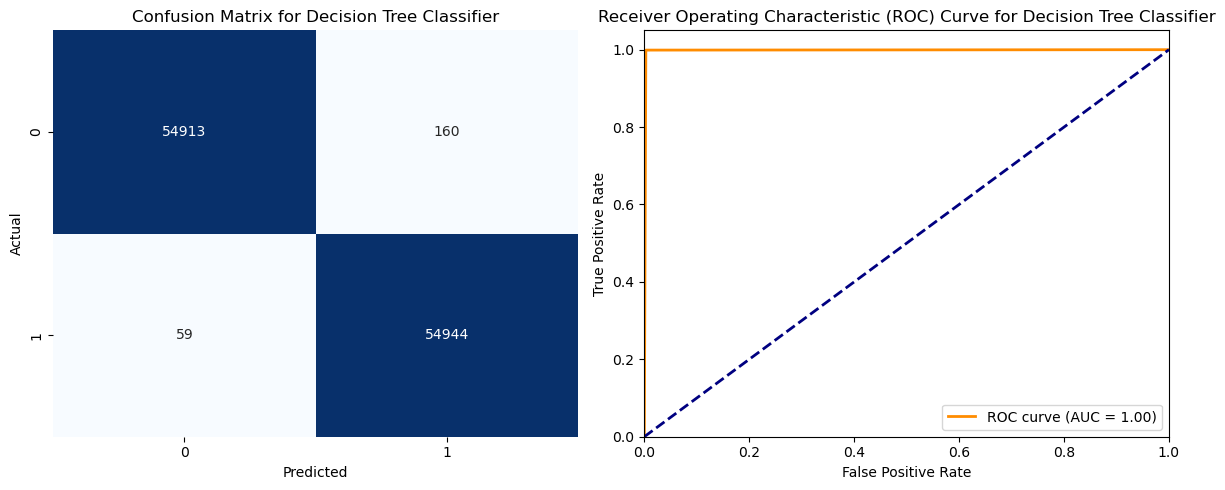

In [84]:
# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_predict2)
# Create a figure with two subplots
plt.figure(figsize=(12, 5))
# Subplot for Confusion Matrix
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
# ROC Curve and AUC
Y_prob2 = dt.predict_proba(X_test)[:, 1]  # Getting probabilities for the positive class (1)
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob2)
roc_auc = auc(fpr, tpr)
# Subplot for ROC Curve
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random guessing)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree Classifier')
plt.legend(loc="lower right")
# Show the combined plots
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

##### Training the Model using Random Forest Classifier after performing Oversampling

In [85]:
#Training the model using Random Forest Classifier
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [86]:
#Predicting the model using Random Forest Classifier
Y_predict3=rf.predict(X_test)

In [87]:
#Accuracy Score: 
accuracy_score(Y_test,Y_predict3)

0.9999273229405138

In [88]:
#Precision Score:
precision_score(Y_test,Y_predict3)

0.9998545745396376

In [89]:
#Recall Score: 
recall_score(Y_test,Y_predict3)

1.0

In [90]:
#F1 Score: 
f1_score(Y_test,Y_predict3)

0.9999272819822931

In [91]:
# Classification Report
print("Classification Report for Random Forest Classifier:")
print(classification_report(Y_test, Y_predict3))

Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55073
           1       1.00      1.00      1.00     55003

    accuracy                           1.00    110076
   macro avg       1.00      1.00      1.00    110076
weighted avg       1.00      1.00      1.00    110076



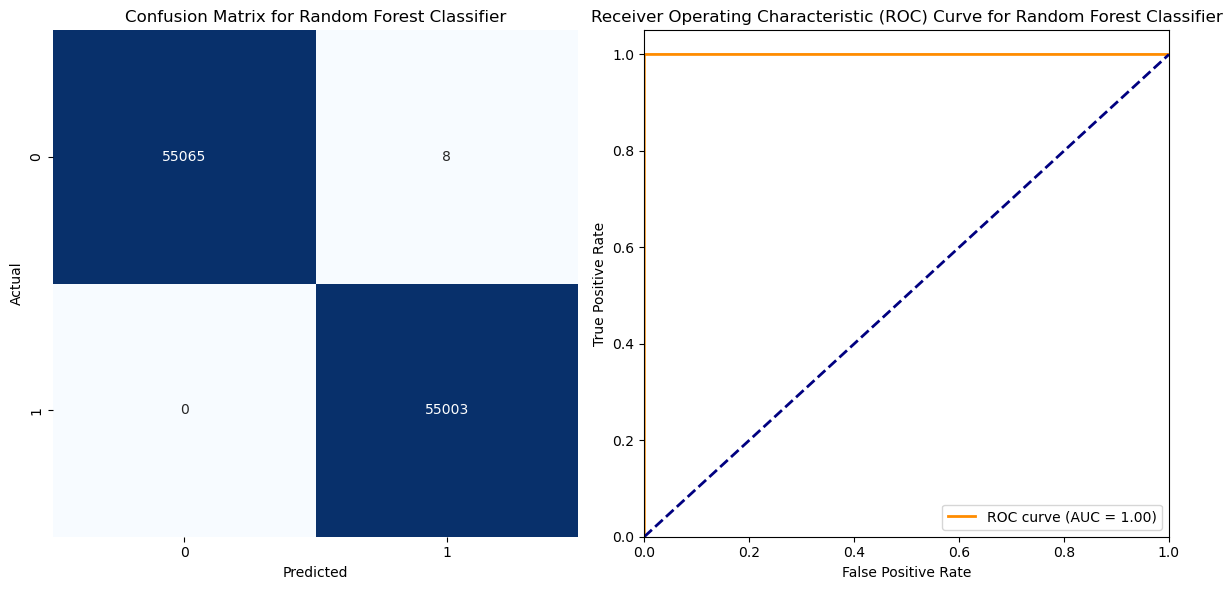

In [92]:
# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_predict3)
# ROC Curve and AUC
Y_prob3 = rf.predict_proba(X_test)[:, 1]  # Getting probabilities for the positive class (1)
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob3)
roc_auc = auc(fpr, tpr)
# Create side-by-side plots for confusion matrix and ROC curve
plt.figure(figsize=(12, 6))
# Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
# ROC Curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random guessing)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

##### Visualizing the Evaluation of the Models

In [93]:
final_accuracydata=pd.DataFrame({'Models':['LR','DT','RF'],"Accuracy":                                                                                                    
                                                          [accuracy_score(Y_test,Y_predict1)*100,                                    
                                                          accuracy_score(Y_test,Y_predict2)*100,                      
                                                          accuracy_score(Y_test,Y_predict3)*100]})
final_accuracydata

,Models,Accuracy
0,LR,94.412951
1,DT,99.801047
2,RF,99.992732


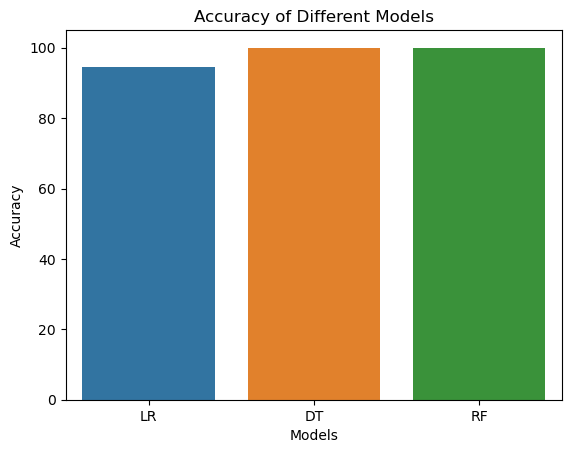

In [94]:
sns.barplot(x='Models',y='Accuracy',data=final_accuracydata)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.show()

### Save The Model 

In [95]:
#Saving the Model Random Forest Classifier
rf1.fit(X_result,Y_result)

RandomForestClassifier()

In [96]:
#The RandomForestClassifier model is saved using the Joblib library and stored with the filename "Credit_Card_Model".
joblib.dump(rf1,"Credit_Card_Model")

['Credit_Card_Model']

In [97]:
#Loading the Pre-trained Model Random Forest Classifier
model=joblib.load('Credit_Card_Model')

In [98]:
import pickle
filename = 'credit-card-model.pkl'
pickle.dump(model, open(filename, 'wb'))

### Predicting the Model

In [99]:
#A prediction is made using the model and the input transactions given in the Dataset
predict=model.predict([[-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [100]:
#Decision-making statement based on the model's prediction.
if predict==0:
       print("Normal Transaction")
else:
        print("Fraudulent Transaction")

Normal Transaction


# GUI APPLICATION

In [101]:
def show_entry_fields():
    # Collecting the input values
    values = [float(entry.get()) for entry in entries]
    # Loading the model
    model = joblib.load('Credit_Card_Model')
    # Making a prediction
    y_predict = model.predict([values])
    # Interpreting the result
    if y_predict == 0:
        result = "Normal Transaction"
    else:
        result = "Fraud Transaction"
    # Displaying the result in a message box
    messagebox.showinfo("Credit Card Fraud Detection System", f"Final Prediction: {result}")
    # Using TTS to speak the result
    engine = pyttsx3.init()
    engine.say(f"The transaction is predicted to be a {result}")
    engine.runAndWait()
# Setting up the main application window
master = tk.Tk()
master.title("Credit Card Fraud Detection System")
# Header label
tk.Label(master, text="Credit Card Fraud Detection System", bg="black", fg="white", width=50).grid(row=0, column=0, columnspan=2)
# Creating entry fields for the features
entries = []
for i in range(1, 29):
    tk.Label(master, text=f"Enter Value of V{i}").grid(row=i, column=0)
    entry = tk.Entry(master)
    entry.grid(row=i, column=1)
    entries.append(entry)
# Adding the "Amount" field for the 29th entry
tk.Label(master, text="Enter Amount").grid(row=29, column=0)
amount_entry = tk.Entry(master)
amount_entry.grid(row=29, column=1)
entries.append(amount_entry)
# Centering the predict button
button_frame = tk.Frame(master)
button_frame.grid(row=30, column=0, columnspan=2, pady=10)
predict_button = tk.Button(button_frame, text='PREDICT', command=show_entry_fields, width=10)
predict_button.pack(pady=5, padx=10, ipadx=10, ipady=5)
# Centering the entire window on the screen
window_width = master.winfo_reqwidth()
window_height = master.winfo_reqheight()
position_right = int(master.winfo_screenwidth() / 2 - window_width / 2)
position_down = int(master.winfo_screenheight() / 2 - window_height / 2)
master.geometry("+{}+{}".format(position_right, position_down))
# Running the application
master.mainloop()